# 전국 도시 공원 표준 데이터

https://www.data.go.kr/dataset/15012890/standard.do
* 전국 도시 공원 표준데이터에는 데이터를 전처리 해보기에 좋은 데이터가 많습니다.
* 시간, 결측치, 이상치, 수치형, 범주형 데이터를 고르게 볼 수 있으며 다양한 텍스트 데이터 처리를 해볼 수 있습니다.
* 또 정규표현식을 활용해서 텍스트 데이터 전처리와 데이터 마스킹 기법에 대해 다룹니다.
* 그리고 이렇게 전처리한 내용을 바탕으로 전국 도시공원에 대한 분포를 시각화해 봅니다.
* 어떤 공원이 어느 지역에 어떻게 분포되어 있는지를 위경도로 표현해 봅니다.

## 이번 챕터에서 설치가 필요한 도구

* 별도의 설치가 필요합니다.(folium 을 설치했던 것 처럼 따로 설치해야지만 사용할 수 있습니다.)

* 윈도우
    * <font color="red">주피터 노트북 상에서 설치가 되지 않으니</font> anaconda prompt 를 열어서 설치해 주세요.
    * <font color="red">관리자 권한</font>으로 아나콘다를 설치하셨다면 다음의 방법으로 anaconda prompt 를 열어 주세요.
    <img src="https://i.imgur.com/GhoLwsd.png">
* 맥
    * terminal 프로그램을 열어 설치해 주세요. 


### Pandas Profiling
* [pandas-profiling/pandas-profiling: Create HTML profiling reports from pandas DataFrame objects](https://github.com/pandas-profiling/pandas-profiling)

* 2020년 4월 기준 판다스 1.0 이상 버전을 지원하지 않습니다.
* 아나콘다로 주피터를 설치했다면 : `conda install -c conda-forge pandas-profiling`
* pip로 주피터를 설치했다면 : `pip install pandas-profiling`

### 워드클라우드
[amueller/word_cloud: A little word cloud generator in Python](https://github.com/amueller/word_cloud)

* 다음 명령어로 설치가 가능합니다. conda prompt 혹은 터미널을 열어 설치해 주세요.

* conda : `conda install -c conda-forge wordcloud`
* pip : `pip install wordcloud`

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# seaborn의 set 기능으로 폰트, 마이너스 폰트 및 스타일 설정
# sns.set을 새로 할 경우 초기화 되어 이전 설정이 적용 안됨.
# 제대로 설정 안된다면 sns.set가 한 번 이상 설정된게 아닌지 확인할 것.

sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False}, 
        style="darkgrid")

In [3]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

<AxesSubplot:title={'center':'한글폰트'}>

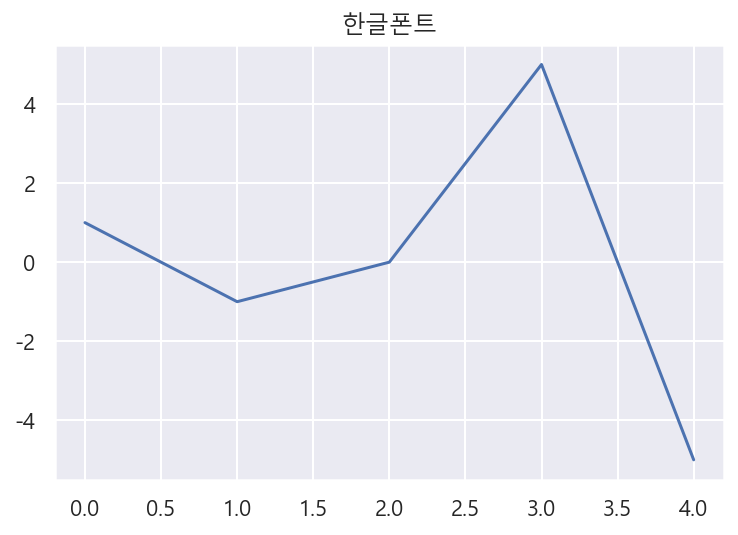

In [4]:
pd.Series([1, -1, 0, 5, -5]).plot(title="한글폰트")

## 데이터 로드

In [5]:
# 데이터 로드해서 df 변수에 담기
%ls C:\Users\pmj35\Documents\project

 C 드라이브의 볼륨: Acer
 볼륨 일련 번호: 1CC4-4493

 C:\Users\pmj35\Documents\project 디렉터리

2021-02-15  오후 09:46    <DIR>          .
2021-02-15  오후 09:46    <DIR>          ..
2021-02-13  오후 01:34    <DIR>          .ipynb_checkpoints
2021-01-31  오후 09:21         2,143,772 apartment.ipynb
2021-02-12  오후 06:26         6,195,688 coffee.ipynb
2021-02-10  오후 06:55         9,687,774 franchise.ipynb
2021-02-10  오후 06:55         1,110,377 heatmap.html
2021-02-10  오후 07:00             3,441 index.html
2021-02-13  오후 03:35    <DIR>          open-data-analysis-basic-master
2021-02-10  오후 06:42         1,085,776 paris-TousLesJours-index.html
2021-02-15  오후 09:46         2,130,521 park.ipynb
2021-02-15  오후 09:07         1,827,462 park_pandas_profile.html
2021-02-12  오후 05:02            57,732 seoul_municipalities_geo_simple.json
2021-02-10  오후 05:48        77,085,147 seoul_open_store.csv
2021-02-10  오후 07:01         5,853,302 store.ipynb
2021-02-01  오후 10:33       264,920,940 상가업소정보_201912_01.csv
2020-12-26  오후

In [6]:
df=pd.read_csv("전국도시공원표준데이터.csv", encoding="cp949")
df.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 19
0,26440-00001,구랑공원,문화공원,NaN,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,4,NaN,화장실,NaN,"팔각정자, 파고라2, 평의자6, 앉음벽14.38m, 축구장(골대2), 컨테이너, 안...",2011-09-02,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
1,26440-00002,압곡공원,근린공원,NaN,부산광역시 강서구 구랑동 1219,35.154655,128.854727,33756.0,4,NaN,NaN,NaN,"배드민턴장, 족구장, 파고라4, 안내판, 볼라드7, 데크435.11㎡, 데크계단19...",2008-02-28,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
2,26440-00003,서연정공원,소공원,NaN,부산광역시 강서구 대저1동 1330-7,35.216183,128.969558,646.0,7,NaN,NaN,NaN,"앉음벽13.57m, 트렐리스3, 안내판2, 플랜트2, 파고라, 평의자4",2013-01-23,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
3,26440-00004,용두공원,어린이공원,NaN,부산광역시 강서구 대저2동 1870-67,35.183679,128.956007,1620.0,NaN,"조합놀이기구, 그네",NaN,NaN,"정자, 농구장, 평의자6",1998-07-25,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
4,26440-00005,새동내공원,어린이공원,NaN,부산광역시 강서구 대저2동 2407-1,35.174568,128.950612,1009.0,8,"조합놀이기구, 그네, 흔들놀이기구2",NaN,NaN,"정자, 평의자14, 트렐리스2, 안내판, 볼라드",1995-04-07,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN


## Pandas Profilling

In [7]:
import pandas_profiling

* 미리 생성해 놓은 리포트 보기 : https://corazzon.github.io/open-data-analysis-basic/05-park_pandas_profile.html

In [8]:
# html 파일보면 interactions와 correlations가 제대로 안 나옴
# 이건 pandas_profiling 버전 문제로, 2.8.0 버전을 설치해보면 해결될 것.
from pandas_profiling import ProfileReport

%time profile=ProfileReport(df, title="도시공원 표준 데이터")
profile.to_file(output_file="park_pandas_profile.html")

Wall time: 55.9 ms


C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50948 missing from current fo

C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47732 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51201 missing from current

C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50896 missing from c

C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49444 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50868 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 55148 missing from current fon

C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50896 missing from c

C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47196 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51452 missing from current fon

C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text

C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47196 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 48372 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49444 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 55148 missing from current fon

C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 50612 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 47536 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 44540 missing from current font.
  font.set_text

C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50977 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50669 missing from current fon

C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47732 missing from c

C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pmj35\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47732 missing from c

## 기본정보 보기

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18137 entries, 0 to 18136
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   관리번호          18137 non-null  object 
 1   공원명           18137 non-null  object 
 2   공원구분          18137 non-null  object 
 3   소재지도로명주소      8039 non-null   object 
 4   소재지지번주소       17158 non-null  object 
 5   위도            18137 non-null  float64
 6   경도            18137 non-null  float64
 7   공원면적          18137 non-null  float64
 8   공원보유시설(운동시설)  4845 non-null   object 
 9   공원보유시설(유희시설)  6964 non-null   object 
 10  공원보유시설(편익시설)  5084 non-null   object 
 11  공원보유시설(교양시설)  1160 non-null   object 
 12  공원보유시설(기타시설)  3116 non-null   object 
 13  지정고시일         15225 non-null  object 
 14  관리기관명         17383 non-null  object 
 15  전화번호          16957 non-null  object 
 16  데이터기준일자       18137 non-null  object 
 17  제공기관코드        18137 non-null  object 
 18  제공기관명         18137 non-nu

In [10]:
#결측치 수 구하기
df.isnull().sum()

관리번호                0
공원명                 0
공원구분                0
소재지도로명주소        10098
소재지지번주소           979
위도                  0
경도                  0
공원면적                0
공원보유시설(운동시설)    13292
공원보유시설(유희시설)    11173
공원보유시설(편익시설)    13053
공원보유시설(교양시설)    16977
공원보유시설(기타시설)    15021
지정고시일            2912
관리기관명             754
전화번호             1180
데이터기준일자             0
제공기관코드              0
제공기관명               0
Unnamed: 19     18137
dtype: int64

In [11]:
# 결측 평균을 통해 비율을 구하고 100을 곱해줌 -> % 값으로 알 수 있음
# round()소수점 아래 숫자 설정 가능

round(df.isnull().mean()*100, 2)

관리번호              0.00
공원명               0.00
공원구분              0.00
소재지도로명주소         55.68
소재지지번주소           5.40
위도                0.00
경도                0.00
공원면적              0.00
공원보유시설(운동시설)     73.29
공원보유시설(유희시설)     61.60
공원보유시설(편익시설)     71.97
공원보유시설(교양시설)     93.60
공원보유시설(기타시설)     82.82
지정고시일            16.06
관리기관명             4.16
전화번호              6.51
데이터기준일자           0.00
제공기관코드            0.00
제공기관명             0.00
Unnamed: 19     100.00
dtype: float64

## 결측치 시각화

In [12]:
# seaborn의 set 기능으로 한글폰트 재설정

sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False}, 
        style="darkgrid")

In [13]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

<AxesSubplot:>

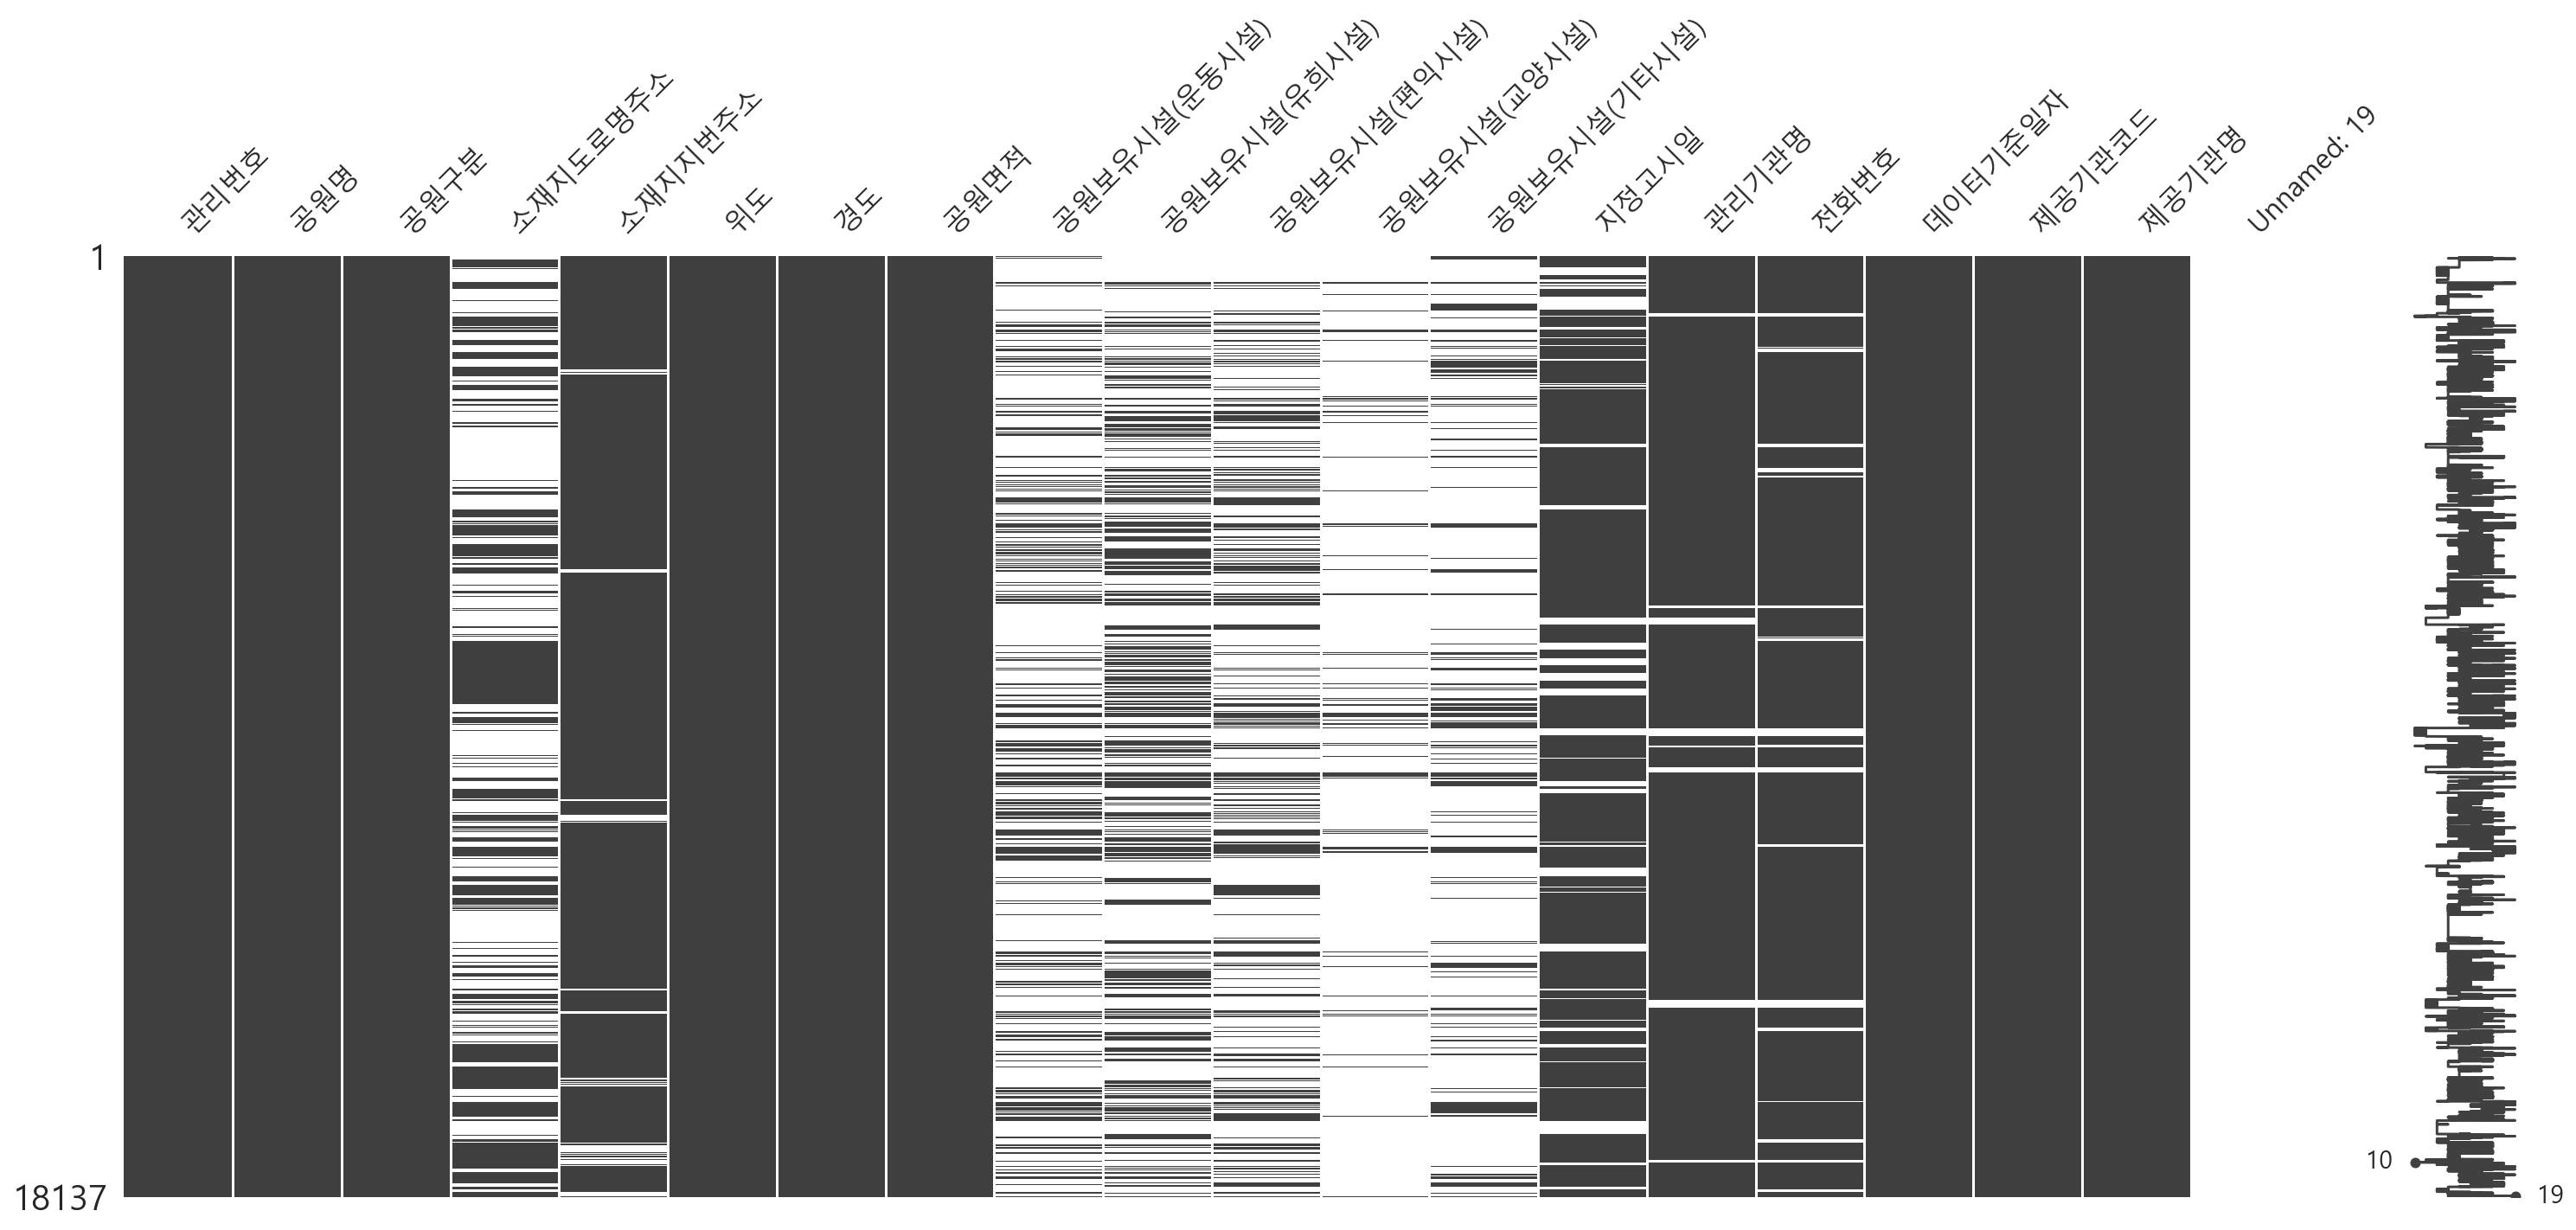

In [14]:
import missingno

missingno.matrix(df)

<AxesSubplot:>

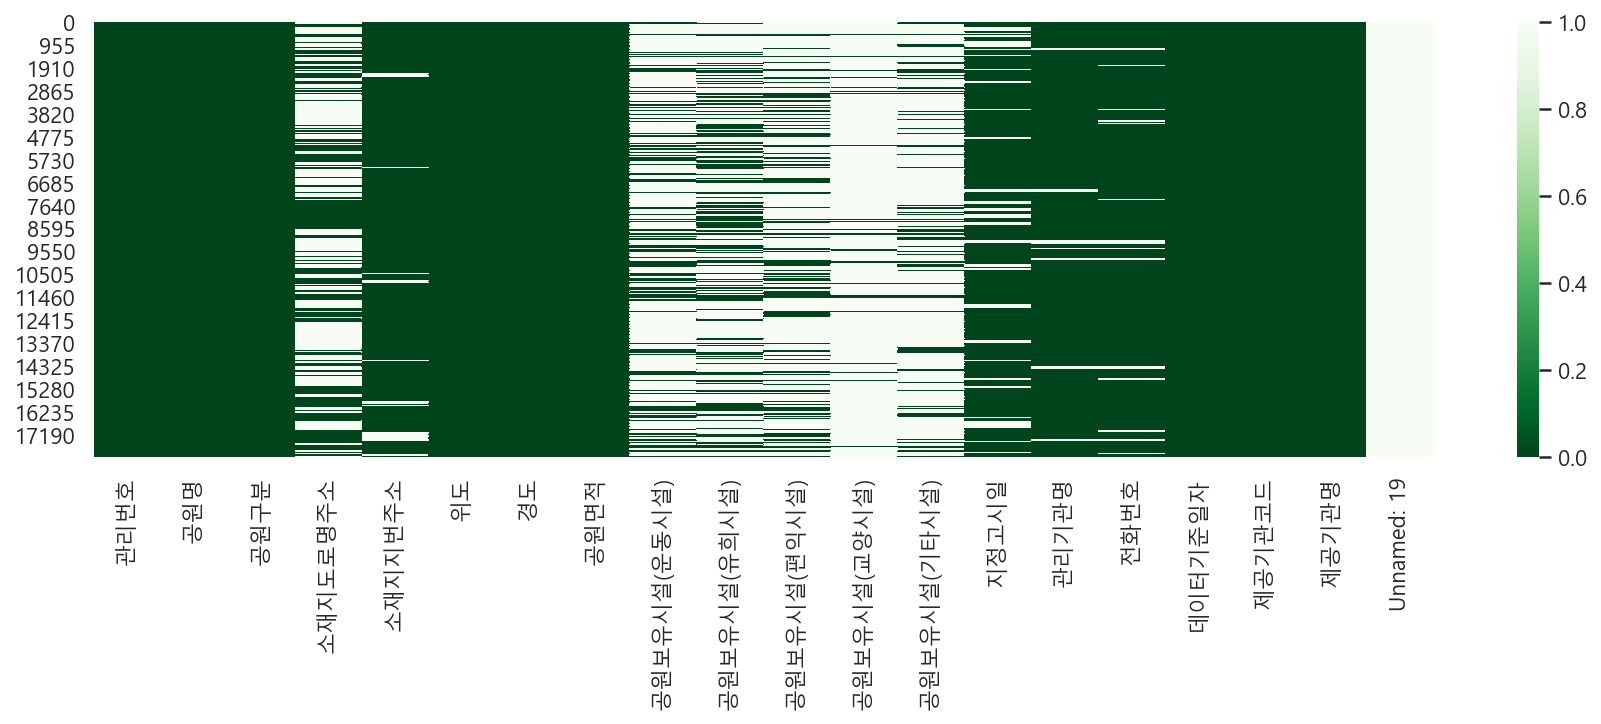

In [15]:
# seaborn으로 위와 같은 결측치 그래프 그려보기
# 1.0 = True, 0.0= False
# 흰색에 가까울수록 결측치가 많다는 것을 의미
null=df.isnull()
plt.figure(figsize=(15, 4))
sns.heatmap(null, cmap="Greens_r")

# 데이터 전처리
* 불필요한 컬럼제거
    * 시도 결측치 처리
    * 다른 데이터로 대체
* 도로명 혹은 지번 둘 중 하나만 있다면 있는 데이터로 대체
* 아웃라이어 데이터 제거 혹은 대체
    * 위/경도가 국내 범위를 벗어나는 데이터 제외하도록 처리

## 불필요한 컬럼 제거

In [16]:
# 전체 컬럼명 출력
df.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명',
       'Unnamed: 19'],
      dtype='object')

In [17]:
# drop으로 "Unnamed: 19" 제거
print(df.shape)
df=df.drop(["Unnamed: 19"], axis=1)
print(df.shape)

(18137, 20)
(18137, 19)


## 결측치 대체

### 도로명 주소와 지번 주소
* 둘 중 하나만 있을 때, 나머지 데이터로 결측치 대체하기

In [18]:
# 도로명 주소의 결측치 수
df["소재지도로명주소"].isnull().sum()

10098

In [19]:
# 지번 주소의 결측치 수
df["소재지지번주소"].isnull().sum()

979

In [20]:
# '소재지도로명주소'와 '소재지지번주소'가 모두 결측치가 아닌 데이터 찾기
df[df['소재지도로명주소'].notnull() & df['소재지지번주소'].notnull()].shape

(7060, 19)

In [21]:
# '소재지도로명주소'의 결측치에 fillna를 이용해 '소재지지번주소' 값을 채우기
df['소재지도로명주소']=df['소재지도로명주소'].fillna(df["소재지지번주소"])

In [22]:
# '소재지도로명주소' 결측치 세기
df['소재지도로명주소'].isnull().sum()

0

In [23]:
# '소재지도로명주소'와 '소재지지번주소'가 모두 결측치인 데이터 찾기
df[df['소재지도로명주소'].isnull() & df['소재지지번주소'].isnull()].shape

(0, 19)

### 주소를 통한 시도, 구군 변수 생성

In [24]:
# 소재지도로명주소로 시도, 구군 변수 생성하기
# str.split()[0]으로 데이터를 가져오면 제일 첫 번째 레코드를 가져옴 
# str.split(' ', expand=True)[0] 으로 공백문자를 기준으로 분리한 후, 리스트 첫 번째 값 가져오기
df["시도"]=df["소재지도로명주소"].str.split(' ', expand=True)[0]
df["구군"]=df["소재지도로명주소"].str.split(expand=True)[1]
df[["소재지도로명주소", "시도", "구군"]].head()

,소재지도로명주소,시도,구군
0,부산광역시 강서구 구랑동 1199-7,부산광역시,강서구
1,부산광역시 강서구 구랑동 1219,부산광역시,강서구
2,부산광역시 강서구 대저1동 1330-7,부산광역시,강서구
3,부산광역시 강서구 대저2동 1870-67,부산광역시,강서구
4,부산광역시 강서구 대저2동 2407-1,부산광역시,강서구


In [25]:
# 시도 데이터 빈도수 세기
df["시도"].value_counts()

경기도        3318
전라남도       1882
경상남도       1825
서울특별시      1745
충청남도       1723
전라북도       1137
경상북도        917
충청북도        899
울산광역시       887
인천광역시       675
부산광역시       653
강원도         647
대구광역시       586
대전광역시       497
광주광역시       429
제주특별자치도     246
세종특별자치시      70
강원            1
Name: 시도, dtype: int64

In [26]:
# 강원은 강원도로 변경하기
df["시도"]=df["시도"].replace("강원", "강원도")
df["시도"].value_counts()

경기도        3318
전라남도       1882
경상남도       1825
서울특별시      1745
충청남도       1723
전라북도       1137
경상북도        917
충청북도        899
울산광역시       887
인천광역시       675
부산광역시       653
강원도         648
대구광역시       586
대전광역시       497
광주광역시       429
제주특별자치도     246
세종특별자치시      70
Name: 시도, dtype: int64

## 이상치 제거
* 경도, 위도의 이상치를 제거

<AxesSubplot:xlabel='경도', ylabel='위도'>

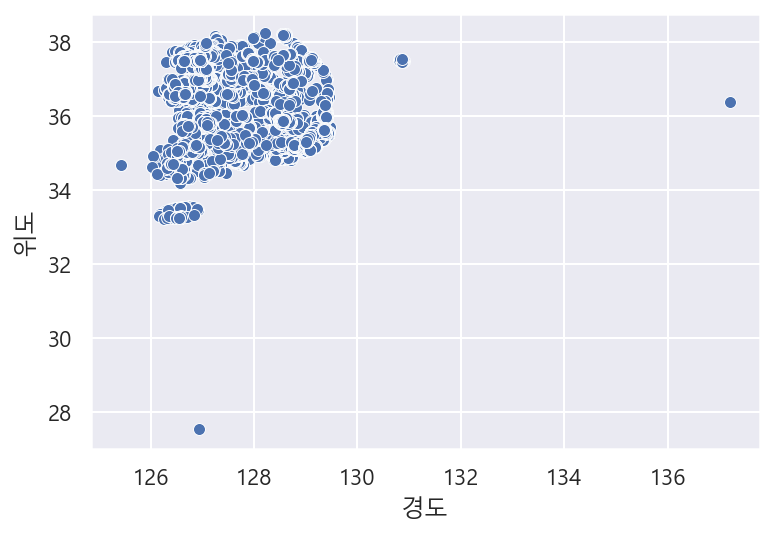

In [27]:
# 위셩도 시각화
sns.scatterplot(data=df, x="경도", y="위도")

In [28]:
# 위 지도에서 위경도의 아웃라이어를 제외하고 출력
# 정확하게 출력하기 위해 대한민국 위경도 데이터 범위를 넣어주기
# 이상치를 제거한 데이터는 df_park라는 변수에 담기
df_park=df[(df["경도"] < 132) & (df["위도"]>32)].copy()

<AxesSubplot:xlabel='경도', ylabel='위도'>

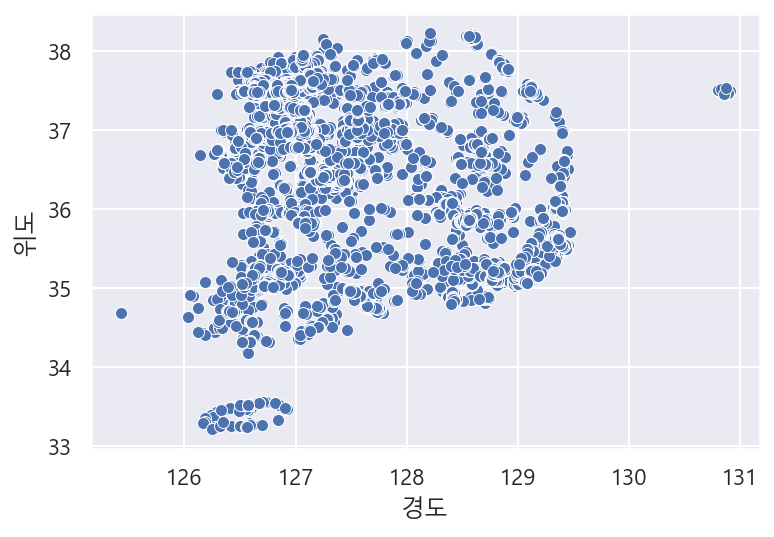

In [29]:
# 위경도 아웃라이어 제거 확인하기
sns.scatterplot(data=df_park, x="경도", y="위도")

In [30]:
# 위경도가 잘못 입력된 데이터 확인
df[(df["경도"] > 132) | (df["위도"] < 32)]

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),...,공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군
374,11440-00004,와우공원,근린공원,서울특별시 마포구 창전동3-231 등 59필지,서울특별시 마포구 창전동3-231 등 59필지,27.551606,126.929047,73590.0,NaN,NaN,...,NaN,NaN,1940-03-12,서울특별시 마포구,02-3153-9553,2019-07-22,3130000,서울특별시 마포구,서울특별시,마포구
12926,43113-00080,근린공원5(만수공원),근린공원,충청북도 청주시 흥덕구 오송읍 만수리 512,충청북도 청주시 흥덕구 오송읍 만수리 512,36.374204,137.202661,33258.0,NaN,NaN,...,NaN,NaN,2003-04-18,충청북도 청주시 푸른도시사업본부 공원관리과,043-201-4433,2019-06-21,5710000,충청북도 청주시,충청북도,청주시


## 날짜 데이터 다루기

In [31]:
# 지정고시일 데이터 타입 확인하고, 데이터 타입을 datetime형태로 변경
df["지정고시일"].head(1)
df["지정고시일"]=pd.to_datetime(df["지정고시일"])
df["지정고시일"].head(1)

0   2011-09-02
Name: 지정고시일, dtype: datetime64[ns]

In [32]:
# 고시연도와 고시월을 지정고시일에서 추출한 후 파생변수 만들기
df["고시연도"]=df["지정고시일"].dt.year
df["고시월"]=df["지정고시일"].dt.month
df[["지정고시일", "고시연도", "고시월"]].head()

,지정고시일,고시연도,고시월
0,2011-09-02,2011.0,9.0
1,2008-02-28,2008.0,2.0
2,2013-01-23,2013.0,1.0
3,1998-07-25,1998.0,7.0
4,1995-04-07,1995.0,4.0


In [33]:
# 화랑공원의 고시연도 찾고 데이터 전처리 맞게 되었는지 확인 
df.loc[df["공원명"].str.contains("화랑"), ["공원명", "고시연도"]]

,공원명,고시연도
3077,판교제8호(화랑)공원,2004.0
4310,화랑공원,2010.0
7316,화랑공원,1972.0
10490,화랑,2004.0
10763,화랑공원,1980.0
15066,화랑,1991.0


C:\Users\pmj35\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pmj35\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='고시연도', ylabel='Density'>

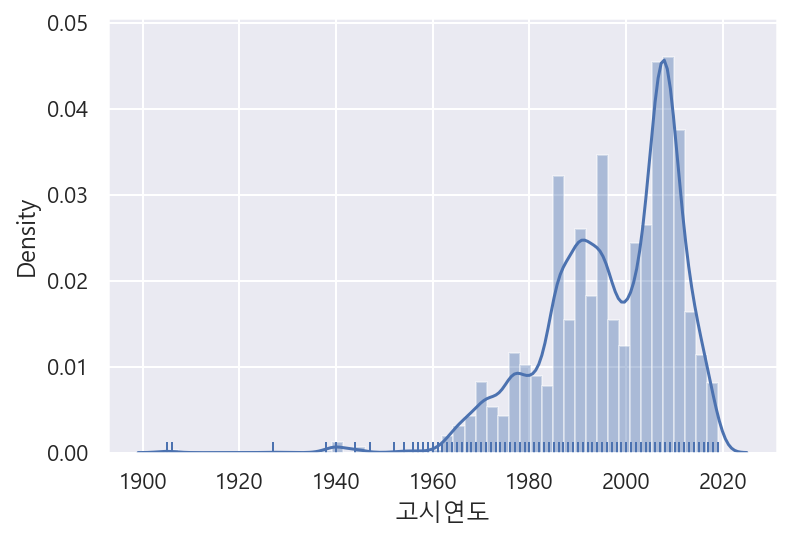

In [34]:
# 고시연도의 분포를 displot으로 그리기
# 이 때, 결측치가 있으면 오류가 나기 때문에 결측치 없는 데이터만 모아 그리기
sns.distplot(df.loc[df["고시연도"].notnull(), "고시연도"], rug=True)

* 판다스 스타일링 : [Styling — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html)
* 숫자의 많고 적음에 따라 heatmap 처럼 스타일을 표현 가능 합니다.

In [35]:
# 연도와 월별 고시 현황을 pivot_table로 그리기
# year_month라는 변수에 담아서 사용
# 데이터가 많기 때문에 2000 < x < 2019 의 데이터만 보기
year_month=pd.pivot_table(data=df, index="고시연도", columns="고시월", 
               values="공원명", aggfunc="count")
year_month=year_month[(year_month.index > 2000) & 
                      (year_month.index < 2019)]
year_month.round(0).astype(int).style.background_gradient()

고시월,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
고시연도,,,,,,,,,,,,
2001.0,48,12,7,42,21,16,6,16,30,36,37,40
2002.0,38,19,18,10,18,14,49,17,7,7,59,55
2003.0,21,13,17,19,10,23,4,8,7,18,48,38
2004.0,48,18,16,18,13,24,7,48,10,24,59,135
2005.0,55,32,18,23,43,33,16,62,18,34,60,105
2006.0,84,34,69,31,54,32,18,33,24,36,119,120
2007.0,69,12,9,42,16,46,62,66,84,164,245,106
2008.0,163,45,77,42,30,102,15,61,32,20,24,126
2009.0,59,31,162,135,57,60,36,23,96,27,73,100


## 텍스트 데이터 다루기
### 정규표현식

* [정규 표현식 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%A0%95%EA%B7%9C_%ED%91%9C%ED%98%84%EC%8B%9D)


* 파이썬 공식문서 정규표현식 참고하기 : 
    * https://docs.python.org/3.8/library/re.html#re.sub
    
    
* 문자열 바꾸기 : re.sub("규칙", "패턴", "데이터")
    * https://docs.python.org/3.8/library/re.html#text-munging


* 정규표현식 문자열 패턴
    * https://docs.python.org/3.8/howto/regex.html#matching-characters

    
    
* [    ] : 일치시킬 문자 세트의 패턴
* [가나다] : 가 or 나 or 다 중에 하나를 포함하고 있는지
* [가-힣] : 한글 가부터 힣까의 문자 중 하나를 포함하고 있는지
* [0-9] : 0~9까지의 숫자 중 하나를 포함하고 있는지
* [^0-9] : 숫자를 포함하고 있지 않음
* [^가-힣] : 한글이 포함되어 있지 않음
* [가-힣+] : 한글이 하나 이상 포함되는지


| 클래스 | 표현식 | 설명 |
|----|-----|----|
|\d | [0-9]|십진수와 일치|
|\D| [^0-9] | 숫자가 아닌 문자와 일치|
|\s |[\t\n\r\f\v] | 공백 문자와 일치 |
|\S |[^\t\n\r\f\v]| 공백이 아닌 문자와 일치|
| \w| [a-zA-Z0-9_] | 모든 숫자 영문자와 일치|
| \W| [^a-zA-Z0-9_]| 영문자, 숫자가 아닌 것과 일치|


표현식	설명

|표현식 | 설명 |	
|----|-----|
|^x	| 문자열의 시작을 표현하며 x 문자로 시작|
|x$	| 문자열의 종료를 표현하며 x 문자로 종료|
|.x	| 임의의 한 문자의 자리수를 표현하며 문자열이 x 로 끝남|
|x+	| 반복을 표현하며 x 문자가 한번 이상 반복됨|
|x*	| 반복여부를 표현하며 x 문자가 0번 또는 그 이상 반복됨|
|x?	| 존재여부를 표현하며 x 문자가 존재할 수도, 존재하지 않을 수도 있음|
|x\|y	| or 를 표현하며 x 또는 y 문자가 존재함|
|(x)	| 그룹을 표현하며 x 를 그룹으로 처리함|
|(x)(y)	| 그룹들의 집합을 표현하며 순서대로 번호를 부여하여 x, y 는 각 그룹의 데이터로 관리|
|(x)(?:y)	| 그룹들의 집합에 대한 예외를 표현하며 그룹 집합으로 관리되지 않음|
|x{n}	| 반복을 표현하며 x 문자가 n번 반복됨|
|x{n,}	| 반복을 표현하며 x 문자가 n번 이상 반복됨
|x{n,m}	| 반복을 표현하며 x 문자가 최소 n번 이상 최대 m 번 이하로 반복됨|


In [36]:
# 정규표현식 라이브러리 로드
# 파이썬 내장된 라이브러리
import re

### 공원 보유시설

In [37]:
# 컬럼이 많아서 다 보이지 않기 때문에 options.display.max_columns 사용
pd.options.display.max_columns=100

In [38]:
df.head(1)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군,고시연도,고시월
0,26440-00001,구랑공원,문화공원,부산광역시 강서구 구랑동 1199-7,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,4,NaN,화장실,NaN,"팔각정자, 파고라2, 평의자6, 앉음벽14.38m, 축구장(골대2), 컨테이너, 안...",2011-09-02,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시,강서구,2011.0,9.0


### 운동시설
* 텍스트 데이터 빈도수 구하기
* 한 컬럼 내 여러 텍스트가 특수문자로 구분
* 데이터 전처리를 통해 텍스트 빈도수 구하기

In [39]:
df["공원보유시설(운동시설)"].value_counts(sort=False).head(3)

윗몸일으키기 외 10종                          1
자전거발전기, 근육풀기발전기, 허리돌리기발전기, 파도타기발전기    3
족구장,농구장                               7
Name: 공원보유시설(운동시설), dtype: int64

In [40]:
# "공원보유시설(운동시설)"의 unique값을 구하고 리스트 형태로 만들기
# 다시 str형태로 변경한 후 gym 변수에 담기
gym=df["공원보유시설(운동시설)"].unique().tolist()
gym=str(gym)
gym[:1000]

"['4', '7', nan, '8', '5', '6', '3', '10', '14', '9', '30', '2', '13', '12', '40', '17', '-', '농구장', '궁도장', '풋살구장', '풋살구장, 농구장, 인라인스케이트장', '축구장', '족구장', '게이트볼장', '운동기구14개, 농구장2개소, 족구장1개소', '운동기구6개, 족구장1개소', '운동기구10개', '운동기구4개', '운동기구7개', '에어로빅장, 농구장', '테니스장, 씨름장, 농구장', '바디싣업1,스트레칭롤러1,전신돌리기1,허리안마기1,허리비틀기1', 'TM스탭사이클1,TM체어웨이트1,TM트윈바디싣업1,TM트윈트위스트1,TM크로스컨트리1,TM풀웨이트1', '철봉1', '하늘걷기1,마라톤운동1,허리돌리기1,3단철봉,윗몸일으키기1', '철봉1,팔굽혀펴기1,몸통돌리기1,허리좌우로흔들기1', '스트레칭롤러1,풀웨이트1,바웨이트1', '하늘걷기1,온몸허리돌리기1,스트레칭기1,거꾸로매달리기1', '하늘걷기1,온몸허리돌리기1,등허리지압기1,철봉3', '스탭싸이클1,풀웨이트1,트리플트위스트2,트윈바디싣업1,크로스컨트리1,스트레칭롤러1,트윈워밍암1', '하늘걷기2,스탭싸이클1,체어폴1,철봉1,트리플트위스트2,트윈바디싣업1', '윗몸일으키기1,온몸허리돌리기1,팔굽혀펴기1,다리뻗치기1,온몸허리돌리기1,거꾸로매달리기1', '하늘걷기1,온몸허리돌리기1,옆파도타기1', '크로스워킹+스카이워킹1,파워프레스+풀웨이트1,싸이클론+트위스트1,스탠드업+마사지롤1,사이드스윙+터닝암1,푸시웨이트+레그프레스1', '평행봉1', '트윈바디싣업1,트윈트위스트1,스탭싸이클1,크로스컨트리1,체어풀1', '크로스컨트리1,자전거팔뻗기2,등안마기1,트윈워밍암1,체어웨이트1,오버턴스트레칭1', '크로스컨트리1,롤링웨이스트1,레그프레스1,트윈트위스트1,체어웨이트1', '족구장1,역기1', '등지압기1,마라톤운동+공중걷기운동1,허리돌리기+온몸돌리기1, 온몸역기올리기+온몸근육풀기1', '트리플트위스트1,트윈바디싣업1,크로스컨

In [41]:
# replace 이용해서 ,를 빈문자로, 공백을 ,로, +를 ,로 변경
gym=gym.replace("+", ",").replace("'", ",").replace(" ", ",").replace("/", ",")
gym[:1000]

'[,4,,,,7,,,nan,,,8,,,,5,,,,6,,,,3,,,,10,,,,14,,,,9,,,,30,,,,2,,,,13,,,,12,,,,40,,,,17,,,,-,,,,농구장,,,,궁도장,,,,풋살구장,,,,풋살구장,,농구장,,인라인스케이트장,,,,축구장,,,,족구장,,,,게이트볼장,,,,운동기구14개,,농구장2개소,,족구장1개소,,,,운동기구6개,,족구장1개소,,,,운동기구10개,,,,운동기구4개,,,,운동기구7개,,,,에어로빅장,,농구장,,,,테니스장,,씨름장,,농구장,,,,바디싣업1,스트레칭롤러1,전신돌리기1,허리안마기1,허리비틀기1,,,,TM스탭사이클1,TM체어웨이트1,TM트윈바디싣업1,TM트윈트위스트1,TM크로스컨트리1,TM풀웨이트1,,,,철봉1,,,,하늘걷기1,마라톤운동1,허리돌리기1,3단철봉,윗몸일으키기1,,,,철봉1,팔굽혀펴기1,몸통돌리기1,허리좌우로흔들기1,,,,스트레칭롤러1,풀웨이트1,바웨이트1,,,,하늘걷기1,온몸허리돌리기1,스트레칭기1,거꾸로매달리기1,,,,하늘걷기1,온몸허리돌리기1,등허리지압기1,철봉3,,,,스탭싸이클1,풀웨이트1,트리플트위스트2,트윈바디싣업1,크로스컨트리1,스트레칭롤러1,트윈워밍암1,,,,하늘걷기2,스탭싸이클1,체어폴1,철봉1,트리플트위스트2,트윈바디싣업1,,,,윗몸일으키기1,온몸허리돌리기1,팔굽혀펴기1,다리뻗치기1,온몸허리돌리기1,거꾸로매달리기1,,,,하늘걷기1,온몸허리돌리기1,옆파도타기1,,,,크로스워킹,스카이워킹1,파워프레스,풀웨이트1,싸이클론,트위스트1,스탠드업,마사지롤1,사이드스윙,터닝암1,푸시웨이트,레그프레스1,,,,평행봉1,,,,트윈바디싣업1,트윈트위스트1,스탭싸이클1,크로스컨트리1,체어풀1,,,,크로스컨트리1,자전거팔뻗기2,등안마기1,트윈워밍암1,체어웨이트1,오버턴스트레칭1,,,,크로스컨트리1,롤링웨이스트1,레그프레스1,트윈트위스트1,체어웨이트1,,,,족구장1,역기1,,,,등지압기1,마라톤운동,공중걷기운동1,허리돌리기,온몸돌리기1,,온몸역기올리기,온몸근육풀기1,,,,트리플트위스트1,트윈바디싣업1,크로스컨

In [42]:
# 제거할 특수문자를 빈문자로 대체
# re.sub('[?.,;:/\)*~`'!^\-_+<>@\#$%&-=#}*]'.'', text)
# 정규표현시에서 +, *, . 등은 특별한 의미
# 이런 문자를 제거할 때 \를 통해 예외 처리
# 예를들어 . 이라면 \. dmfh tkdyd
# 현재 데이터에서는 숫자와 .을 제거
gym=re.sub("[\[\d\-nan\.\]]", "", gym)
gym=re.sub(",{2,}", ",", gym)
gym[:1000]

',농구장,궁도장,풋살구장,풋살구장,농구장,인라인스케이트장,축구장,족구장,게이트볼장,운동기구개,농구장개소,족구장개소,운동기구개,족구장개소,운동기구개,운동기구개,운동기구개,에어로빅장,농구장,테니스장,씨름장,농구장,바디싣업,스트레칭롤러,전신돌리기,허리안마기,허리비틀기,TM스탭사이클,TM체어웨이트,TM트윈바디싣업,TM트윈트위스트,TM크로스컨트리,TM풀웨이트,철봉,하늘걷기,마라톤운동,허리돌리기,단철봉,윗몸일으키기,철봉,팔굽혀펴기,몸통돌리기,허리좌우로흔들기,스트레칭롤러,풀웨이트,바웨이트,하늘걷기,온몸허리돌리기,스트레칭기,거꾸로매달리기,하늘걷기,온몸허리돌리기,등허리지압기,철봉,스탭싸이클,풀웨이트,트리플트위스트,트윈바디싣업,크로스컨트리,스트레칭롤러,트윈워밍암,하늘걷기,스탭싸이클,체어폴,철봉,트리플트위스트,트윈바디싣업,윗몸일으키기,온몸허리돌리기,팔굽혀펴기,다리뻗치기,온몸허리돌리기,거꾸로매달리기,하늘걷기,온몸허리돌리기,옆파도타기,크로스워킹,스카이워킹,파워프레스,풀웨이트,싸이클론,트위스트,스탠드업,마사지롤,사이드스윙,터닝암,푸시웨이트,레그프레스,평행봉,트윈바디싣업,트윈트위스트,스탭싸이클,크로스컨트리,체어풀,크로스컨트리,자전거팔뻗기,등안마기,트윈워밍암,체어웨이트,오버턴스트레칭,크로스컨트리,롤링웨이스트,레그프레스,트윈트위스트,체어웨이트,족구장,역기,등지압기,마라톤운동,공중걷기운동,허리돌리기,온몸돌리기,온몸역기올리기,온몸근육풀기,트리플트위스트,트윈바디싣업,크로스컨트리,체어웨이트,롤링웨이스트,레그프레스,오버턴스트레칭,윗몸일으키기,트리플트위스트,평행봉,크로스컨트리,레그프레스,체어웨이트,롤링웨이스트,트윈바디싣업,레그스트레칭,크로스컨트리,어깨근육풀기,체어웨이트,트윈바디싣업(구형),트리플트위스트(구형),게이트볼장,운동시설,축구장,족구장,족구장,운동기구,운동기구,축구장,배드민턴장,농구장,배드민턴장,족구장,농구대,배드민턴장,배드민턴장,농구대,농구장,개소,배드민턴장,게이트볼장,개소,체력단련시설,개소,기,등,배드민턴장,개소,체력단련시설,개소,개,배드민턴장,개소,농구장,개소,체력단련시설,개소,개,다목

In [43]:
# split을 사용해 문자열을 ,로 리스트 형태로 만든 후
# 데이터를 판다스 시리즈 형태로 만들면 빈도수를 구할 수 있음
# 빈도수는 gym_count에 담기
gym_count=pd.Series(gym.split(",")).value_counts()
gym_count.head()

배드민턴장     221
농구장       216
운동기구      185
게이트볼장     156
체력단련시설    148
dtype: int64

<AxesSubplot:>

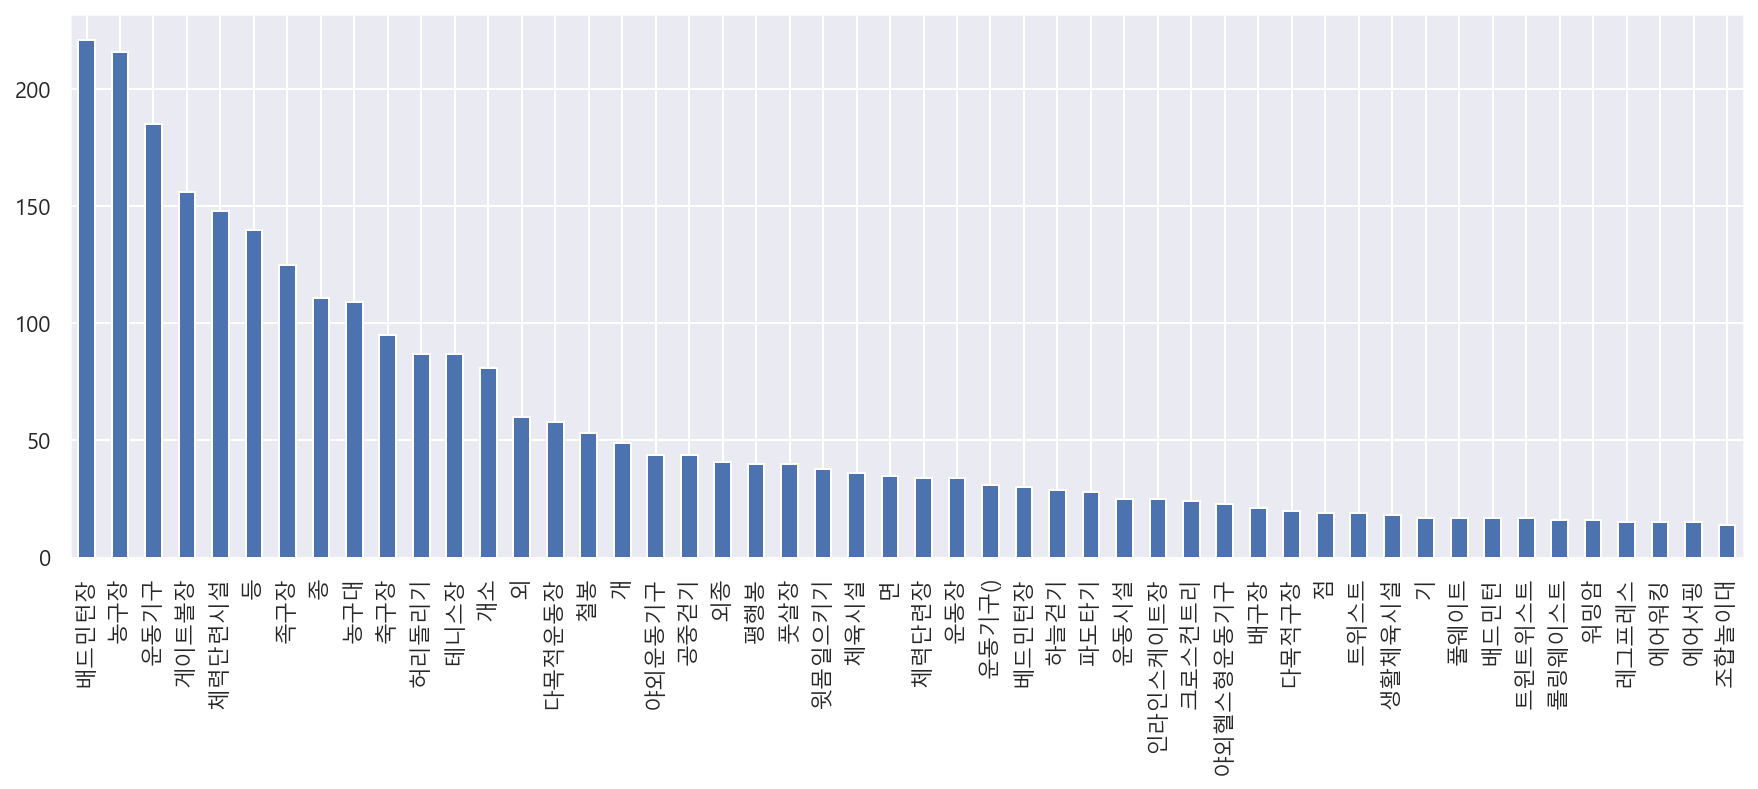

In [44]:
# 빈도수를 구한 gym_count 변수에서 head를 통해 상위 50개의 그래프 그리기
plt.figure(figsize=(15, 5))
gym_count.head(50).plot.bar()

### 워드클라우드로 빈도수 표현
[amueller/word_cloud: A little word cloud generator in Python](https://github.com/amueller/word_cloud)

* 별도의 설치가 필요합니다. 
* 다음 명령어로 설치가 가능합니다. conda prompt 혹은 터미널을 열어 설치해 주세요.

* conda 사용시 : `conda install -c conda-forge wordcloud`
* pip 사용시 : `pip install wordcloud`

In [45]:
# 공식문서의 튜토리얼을 보고 wordcloud를 그리는 함수를 만들어 봅니다.
# 이때 폰트 설정시 폰트명이 아닌 폰트의 설치 경로를 입력해 주셔야 합니다.
# 윈도우 : r"C:\Windows\Fonts\malgun.ttf" 해당 경로에 폰트가 있는지 확인을 해주세요.
# 맥 : r"/Library/Fonts/AppleGothic.ttf"
# 나눔고딕 등의 폰트를 설치했다면 : '/Library/Fonts/NanumBarunGothic.ttf'

from wordcloud import WordCloud

def wordcloud(data, width=1200, height=500):
    word_draw=WordCloud(
        font_path=r"C:\Windows\Fonts\malgun.ttf", 
        stopwords=["운동기구", "개소", "외종"], 
        width=1200, height=500, 
        background_color="white", 
        random_state=42)
    word_draw.generate(data)
    plt.figure(figsize=(15, 5))
    plt.imshow(word_draw)
    plt.axis("off")
    plt.show()

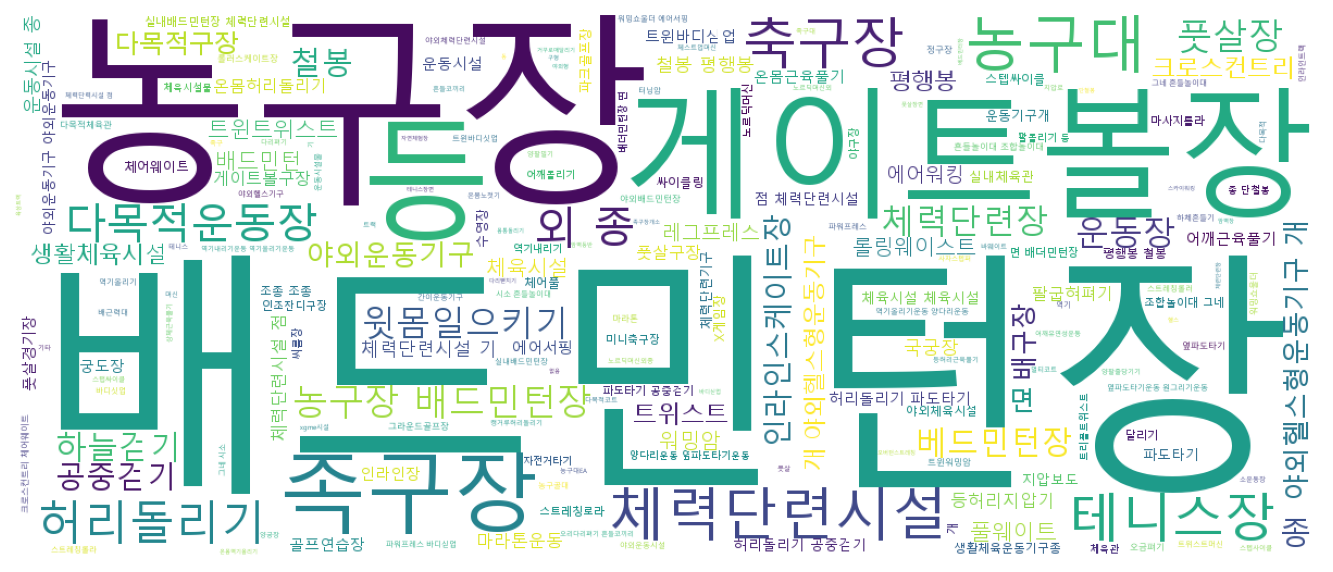

In [46]:
wordcloud(gym)

### 편익시설

In [47]:
# 편익시설에 필요없는 문자 제거하고 각 시설을 ","로 구분하도록 전처리 하는 함수 구현
# 함수명은 get_string으로 지정
def get_string(text):
    if pd.isna(text):
        return text
    
    text=re.sub("[\d\.'\-(nan)\[\]\/]", "", text)
    text=re.sub(" ", "", text)
    text=re.sub(",{2,}", ",", text)
    return text

In [48]:
# 함수가 잘 구현되는지 확인
# 다음 문자를 전처래 했을 때 출력되는 결과 확인
# "[1. '화장실' 5, 2. 주차장, -, nan]" -> '화장실,주차장'
get_string("[1. '화장실' 5, 2. 주차장, -, nan, /]" )

'화장실,주차장,'

In [49]:
# 결측치를 넣었을 때 오류가 나는지 확인
get_string(np.nan)

nan

In [50]:
# map을 통해 위에서 구현한 함수 적용
# 원본과 비교하기 위해 "편익시설"이라는 컬럼 만들기
df["편익시설"]=df["공원보유시설(편익시설)"].map(get_string)
df["편익시설"].head()

0    화장실
1    NaN
2    NaN
3    NaN
4    NaN
Name: 편익시설, dtype: object

In [51]:
# 전처리한 편익시설 빈도수 구하고 tail로 데이터 미리보기
df["편익시설"].value_counts().tail()

의자,파고라,음수대                          1
정자,벤치,화장실,주차장                       1
등의자,평의,족구장                          1
평의자,등의자,사각평상,조형평의자,앉음벽,파고라,종합안내판    1
공중화장실,매점,주차장                        1
Name: 편익시설, dtype: int64

In [52]:
type(np.nan)

float

In [53]:
# 문자열을 연결해주는 join으로 편익시설 연결
# 결측치가 잇ㅇ면 결측치는 숫자형태이기 때문에 문자와 연결되지 않아서 오류가 뜸
# 결측치를 제외한 값만 가져와서 연걸
fac=",".join(df.loc[df["편익시설"].notnull(), "편익시설"])
fac=get_string(fac)
fac[:100]

'화장실,화장실,화장실,주차장,관리사무소,화장실,화장실,화장실,주차장,화장실,주차장,화장실,주차장,문화회관,화장실,화장실,화장실,음수전,음수전,주차장,주차장,화장실,화장실,주차장,화'

In [54]:
# "편익시설"컬럼을 리스트 형태로 만들고 다시 str으로 변환
# get_string 함수로 전처리
fac=str(df["편익시설"].tolist())
fac=get_string(fac)
fac[:100]

'화장실,화장실,화장실,주차장,관리사무소,화장실,화장실,화장실,주차장,화장실,주차장,화장실,주차장,문화회관,화장실,화장실,화장실,음수전,음수전,주차장,주차장,화장실,화장실,주차장,화'

In [55]:
fac_count=pd.Series(fac.split(",")).value_counts()
fac_count.head()

화장실    1921
파고라     817
벤치      650
정자      535
주차장     502
dtype: int64

<AxesSubplot:>

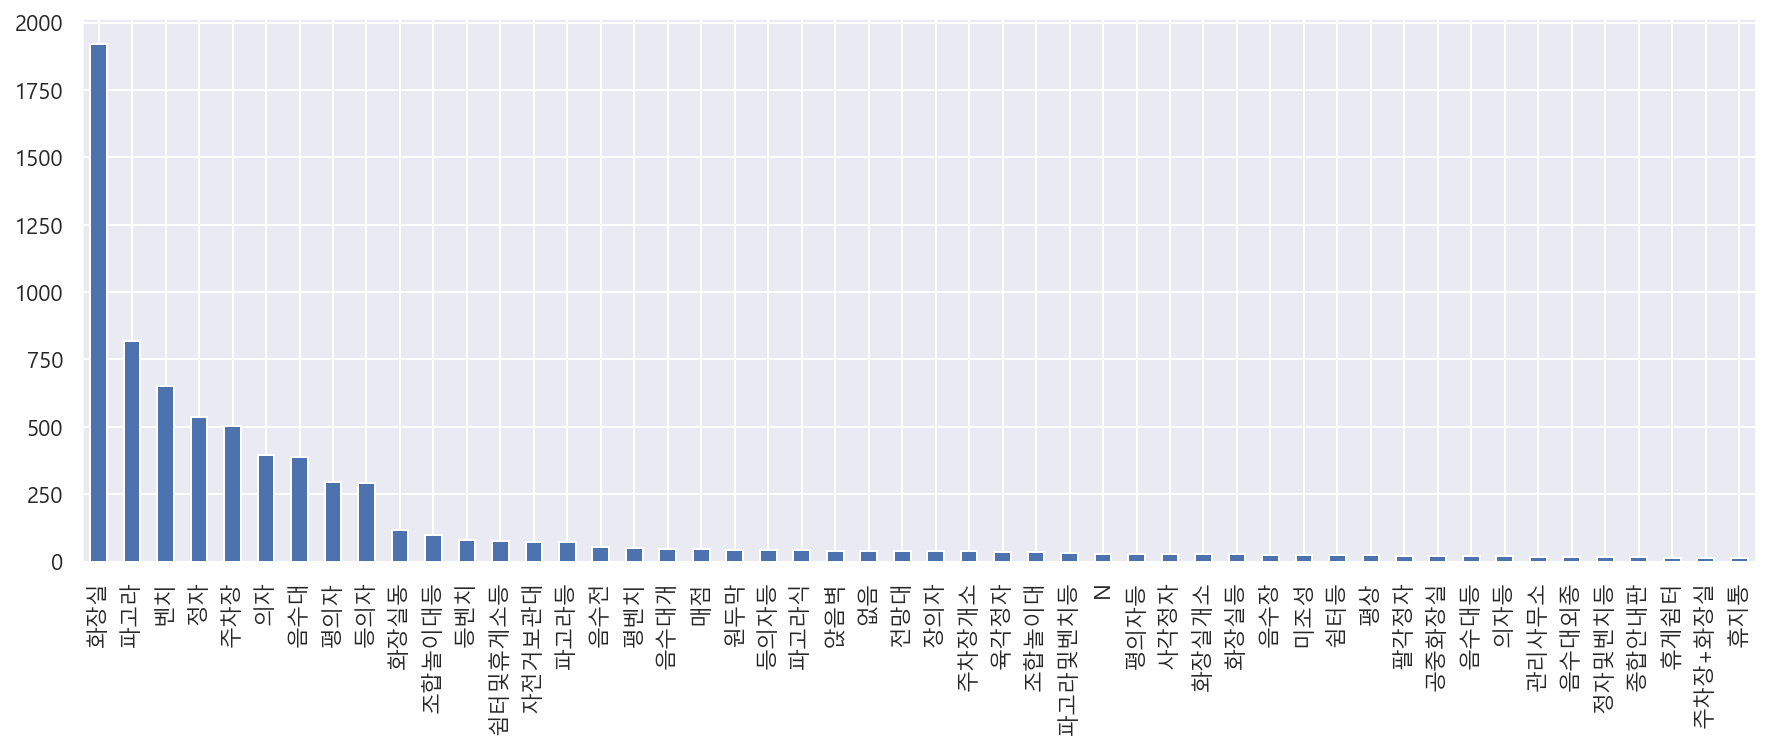

In [56]:
# 상위 50개 단어의 빈도수 그래프 그리기
fac_count.head(50).plot.bar(figsize=(15, 5))

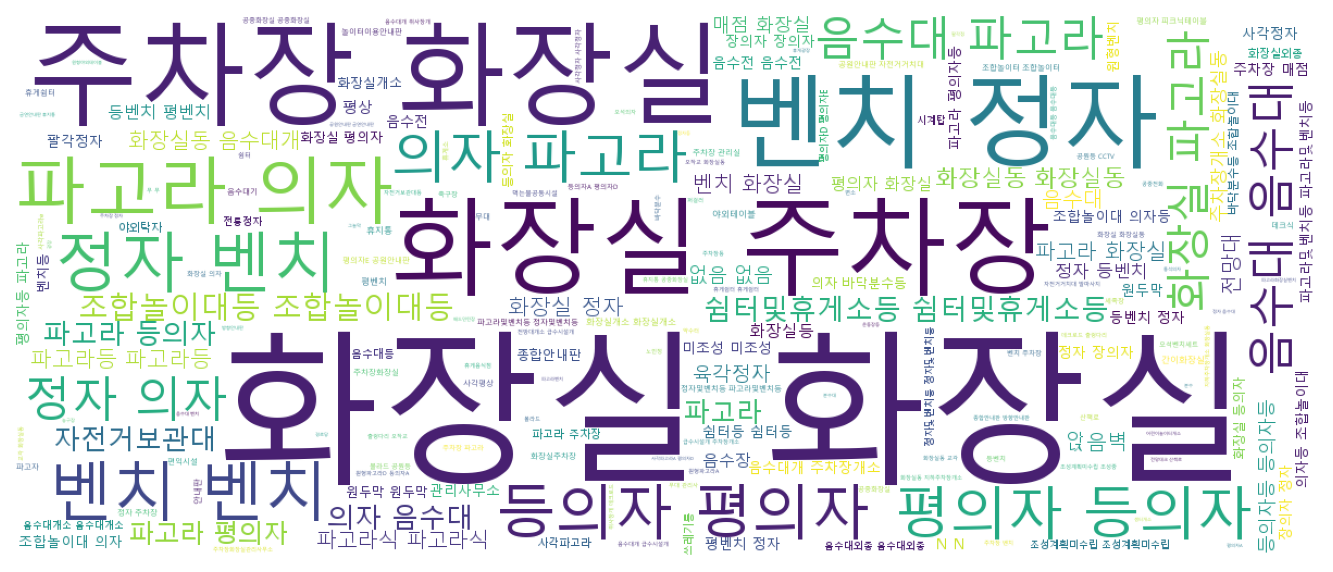

In [57]:
wordcloud(fac)

### 키워드 별 빈도수 구하기
* 위에서 빈도수를 구해보니 "파고라", "파고라등" 이라는 두 개의 단어가 다른 빈도로 세어졌습니다.
* "화장실"도 "화장실동", "공중화장실" 등 다양한 텍스트가 있는 것을 볼 수 있습니다.
* 일일이 전처리를 해주면 좋지만 데이터 전처리에는 많은 예외가 등장합니다.
* 그래서 때로는 보고자 하는 키워드를 넣고 빈도수를 구하는게 전처리를 하는 작업보다 빠를 때도 있습니다.
* 여기에서는 운동시설이나 편의시설이 있는데 특정 시설을 키워드에 넣고 구하는 방법을 사용해 봅니다.

In [61]:
# "공원보유시설(편익시설)"에서 문자열 처리를 하기 위해 결측치 제거한 값 가져오기
# df_fac 변수에 담기
facilities=["화장실", "주차장", "음수대", "파고리", "정자", "벤치", 
            "의자", "놀이터", "축구장", "야영장", "CCTV"]
df_fac=df[df["공원보유시설(편익시설)"].notnull()]
df_fac

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군,고시연도,고시월,편익시설
0,26440-00001,구랑공원,문화공원,부산광역시 강서구 구랑동 1199-7,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,4,NaN,화장실,NaN,"팔각정자, 파고라2, 평의자6, 앉음벽14.38m, 축구장(골대2), 컨테이너, 안...",2011-09-02,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시,강서구,2011.0,9.0,화장실
10,26440-00011,바다공원,근린공원,부산광역시 강서구 명지동 3229-21,부산광역시 강서구 명지동 3229-21,35.087405,128.899938,10001.0,5,NaN,화장실,NaN,"육각정자1, 원형의자4, 평의자12, 평상2, 파고라2, 족구장(28*35M)",1992-05-08,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시,강서구,1992.0,5.0,화장실
22,26440-00023,명지공원,근린공원,부산광역시 강서구 명지오션시티7로 30 (명지동),부산광역시 강서구 명지동 3247번지,35.087766,128.908524,170405.0,10,NaN,"화장실2, 주차장, 관리사무소",NaN,"바닥분수, 다목적운동장, 볼라드62, 안내판4, 안내석, 야외석물탁자5, 통돌벤치2...",2001-09-26,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시,강서구,2001.0,9.0,"화장실,주차장,관리사무소"
26,26440-00027,남강공원,문화공원,부산광역시 강서구 미음동 1553-7,부산광역시 강서구 미음동 1553-7,35.156126,128.856431,5787.0,NaN,NaN,화장실,제실,"파고라3, 등의자3, 평의자9, 안내판1, 볼라드2, 전통담장105.77m, 앉음벽...",2008-02-28,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시,강서구,2008.0,2.0,화장실
30,26440-00031,송정공원,근린공원,"부산광역시 강서구 송정동 1455,1476","부산광역시 강서구 송정동 1455,1476",35.099099,128.823388,55110.0,14,NaN,화장실2,NaN,"사각정자1, 파고라12, 다목적운동장, 평의자12, 등의자24, 음수대2, 문주4,...",1989-10-20,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시,강서구,1989.0,10.0,화장실
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18128,28140-00005,송현공원,근린공원,인천광역시 동구 솔빛로 51,인천광역시 동구 송현동 163,37.477773,126.639225,72492.0,"팔굽혀펴기, 허리돌리기, 배드민턴코드, 철봉, 인라인트랙, 자전거발전기","조합놀이대, 그네, 시소, 매달려건너기, 놀이집","주차장, 화장실, 음수대","달동네박물관, 숲속도서관","관리사무실, 분수, 인공폭포, 생태연못, 물놀이터 또랑",1994-11-07,인천광역시 동구청,032-770-6204,2019-07-30,3500000,인천광역시 동구,인천광역시,동구,1994.0,11.0,"주차장,화장실,음수대"
18129,28140-00006,수문통공원,어린이공원,인천광역시 동구 송현동 60,인천광역시 동구 송현동 60,37.480153,126.635978,634.0,"복합형운동기구, 온몸노젓기","조합놀이대, 자가발전흔들놀이(고래, 호랑이)",음수대,NaN,"조형파고라, 의자",1996-04-08,인천광역시 동구청,032-770-6205,2019-07-30,3500000,인천광역시 동구,인천광역시,동구,1996.0,4.0,음수대
18130,28140-00007,만석공원,어린이공원,인천광역시 동구 만석동 43-14,인천광역시 동구 만석동 43-14,37.483260,126.619536,4404.4,"플웨이트, 스텝사이클, 크라임스템퍼","조합놀이대, 그네","화장실, 음수대",NaN,"풋살경기장, 파고라, 의자, 연식의자",1996-12-05,인천광역시 동구청,032-770-6205,2019-07-30,3500000,인천광역시 동구,인천광역시,동구,1996.0,12.0,"화장실,음수대"
18133,47760-00002,서부공원,근린공원,경상북도 영양군 영양읍 서부리 123,경상북도 영양군 영양읍 서부리 123,36.660456,129.114953,56045.0,NaN,NaN,화장실,NaN,NaN,1973-03-02,경상북도 영양군청,054-680-6340,2019-09-05,5170000,경상북도 영양군,경상북도,영양군,1973.0,3.0,화장실


In [62]:
# facilities 리스트 값을 for문으로 활용해 컬럼 만들기
# 해당 단어가 들어가면 True, 아니면 False로 표현
for f in facilities:
    df[f]=df_fac["공원보유시설(편익시설)"].str.contains(f)

In [65]:
# facilities 리스트 각 컬럼 빈도수 구하기
df[facilities].sum()

화장실     2208.0
주차장      611.0
음수대      493.0
파고리        0.0
정자       648.0
벤치       850.0
의자       949.0
놀이터       21.0
축구장        6.0
야영장        3.0
CCTV       6.0
dtype: float64

## 특정 정보 마스킹
### 전화번호 마스킹

In [70]:
# 가운데 4자리일 때 번호 마스킹 "010-1234-5678"
# re.sub("규칙", "패턴", "데이터")
# 규칙
# (\d{3})은 3자리 숫자를 의미
# (\d{1, 2})은 1~2자리 숫자를 의미
# 패턴
# r"\1-\2**-**\5"이ㅡ "\숫자"는 앞에서 () 안에 정의한 값의 순서를 의미
# 변수의 순서라고 생각해도 무방
# 여기서 \3, \4는 쓰지 않고 *로 대체
# r은 raw를 의미
re.sub("(\d{3})-(\d{2})(\d{2})-(\d{2})(\d{2})", 
       r"\1-\2**-**\5", "010-1234-5678")

'010-12**-**78'

In [73]:
# 가운데가 3자리일 때 번호 마스킹이 잘 동작하는지 확인 "010-123-4567"
re.sub("(\d{3})-(\d{1,2})(\d{2})-(\d{2})(\d{2})", 
       r"\1-\2**-**\5", "010-123-4567")

'010-1**-**67'

In [74]:
# 가운데가 2자리일 때 번호 마스킹이 잘 동작하는지 확인 "010-12-3456"
re.sub("(\d{3})-(\d{1,2})(\d{2})-(\d{2})(\d{2})", 
       r"\1-\2**-**\5", "010-12-3456")

'010-12-3456'

In [75]:
# 국가번호가 들어갈 때 확인 "+82-10-1234-5678"
# -가 들어가거나 예외사항이 있을 때, 마스킹 되지 않을 수 있음. 함수로 해결
re.sub("(\d{3})-(\d{1,2})(\d{2})-(\d{2})(\d{2})", 
       r"\1-\2**-**\5", "+82-10-1234-5678")

'+82-10-1234-5678'

In [87]:
# 함수로 가운데 들어오는 번호 마스킹하도록 처리
# 국제번호 등 다양한 형식의 번호가 들어올 때
phone="+82-10-1234-5678"
def mask_phone_number(phone):
    if pd.isnull(phone):
        return phone
    
    num=phone.split("-")
    num_len=len(num)//2
    num[num_len]= re.sub("\w", "*", num[num_len])
    num[-1]=re.sub("(\d{2})(\d{2})", r"**\2", num[-1])
    return "-".join(num)

mask_phone_number(phone)

'+82-10-****-**78'

In [88]:
# 결측치가 들어갔을 때 오류가 나기 때문에 결측치 체크
mask_phone_number(np.nan)

nan

In [91]:
# 위에서 만든 함수를 map에 적용
df["전화번호(전처리)"]=df["전화번호"].map(mask_phone_number)
df[["공원명", "전화번호", "전화번호(전처리)"]].head(10)

,공원명,전화번호,전화번호(전처리)
0,구랑공원,051-970-4536,051-***-**36
1,압곡공원,051-970-4536,051-***-**36
2,서연정공원,051-970-4536,051-***-**36
3,용두공원,051-970-4536,051-***-**36
4,새동내공원,051-970-4536,051-***-**36
5,상방공원,051-970-4536,051-***-**36
6,덕두공원,051-970-4536,051-***-**36
7,근린공원,051-970-4536,051-***-**36
8,샛바람길공원,051-970-4536,051-***-**36
9,명지소공원,051-970-4536,051-***-**36
